## Suplementary Material of the paper A Survey of Data Augmentation for Audio Classification submeted to [Sound and Music Computing - SMC2022](https://smc22.grame.fr/calls.html#paper-call)

In [ ]:
!pip install audiomentations
!pip install audiomentations[extras]

     |████████████████████████████████| 190 kB 41.8 MB/s 


In [ ]:
import librosa 
import IPython.display as ipd
import librosa.display

from audiomentations import Compose, AddBackgroundNoise, AddGaussianNoise, AddShortNoises, AddGaussianSNR
from audiomentations import Gain, LoudnessNormalization, Normalize, FrequencyMask, TimeMask
from audiomentations import BandPassFilter ,  AddImpulseResponse, HighPassFilter, LowPassFilter # HighShelfFilter, LowShelfFilter, BandStopFilter PeakingFilter
from audiomentations import Mp3Compression, Resample
from audiomentations import Clip, ClippingDistortion, TanhDistortion  
from audiomentations import PolarityInversion, Reverse, Shift            

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


In [8]:
! git clone https://github.com/lucas-fpaiva/survey-audio-aug.git

Cloning into 'survey-audio-aug'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 39 (delta 8), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (39/39), done.


In [9]:
signal, sr = librosa.load("/content/survey-audio-aug/rooster.wav")
signal = signal[0:3*sr]
ipd.Audio(signal, rate=sr)

# Audio Data Augmentation (ADA)

Consists of deformations directly in the audio raw.

This section is based in a previous [guide](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/).

## ADA View function

In [20]:
def view_ADA(name_a1,name_a2):
  fig = plt.figure(figsize=(10, 6))#,dpi=300
  gs = gridspec.GridSpec(nrows=2, ncols=3, height_ratios=[1, 1])

  #  Original signal in time domain
  time = np.linspace(0, len(signal) / sr, num=len(signal))
  y_min = np.min(signal)
  y_max = np.max(signal)

  x_max = len(signal)/sr

  ax0 = fig.add_subplot(gs[0,0])
  ax0.plot(signal, color='b', linewidth=1)
  ax0.set_title('Original',fontsize=16)
  ax0.axes.set_ylim(y_min,y_max)
  ax0.axes.set_xlim(0,x_max*sr)
  ax0.axes.get_xaxis().set_visible(False)

  ax1 = fig.add_subplot(gs[1, 0])

  M = librosa.feature.melspectrogram(y=signal, sr=sr, power=1)
  librosa.display.specshow(librosa.core.amplitude_to_db(M, ref=np.max),
                          y_axis='log', x_axis='time', ax=ax1)
  ax1.set_ylabel(' ')
  ax1.set_xlabel('  ')
  ax1.axes.set_xlim(0,x_max)

  ax2= fig.add_subplot(gs[0,1])
  ax2.plot(signal_a1, color='b', linewidth=1)
  ax2.set_title(name_a1,fontsize=16)
  ax2.set_ylim(y_min,y_max)
  ax2.axes.set_xlim(0,x_max*sr)
  ax2.axes.get_yaxis().set_visible(False)
  ax2.axes.get_xaxis().set_visible(False)



  ax3 = fig.add_subplot(gs[1, 1])
  M = librosa.feature.melspectrogram(y=signal_a1, sr=sr, power=1)
  librosa.display.specshow(librosa.core.amplitude_to_db(M, ref=np.max),
                          y_axis='log', x_axis='time', ax=ax3)
  ax3.axes.get_yaxis().set_visible(False)
  ax3.set_ylabel(' ')
  ax3.set_xlabel('time(s)',fontsize=16)
  ax3.axes.set_xlim(0,x_max)

  if name_a2 != None:
    ax4= fig.add_subplot(gs[0,2])
    ax4.plot(signal_a2, color='b', linewidth=1)
    ax4.set_title(name_a2,fontsize=16)
    ax4.axes.set_ylim(y_min,y_max)
    ax4.axes.set_xlim(0,x_max*sr)
    ax4.axes.get_yaxis().set_visible(False)
    ax4.axes.get_xaxis().set_visible(False)

    ax5 = fig.add_subplot(gs[1, 2])
    M = librosa.feature.melspectrogram(y=signal_a2, sr=sr, power=1)
    librosa.display.specshow(librosa.core.amplitude_to_db(M, ref=np.max),
                            y_axis='log', x_axis='time', ax=ax5)
    ax5.axes.get_yaxis().set_visible(False)
    ax5.axes.set_xlim(0,x_max)
    ax5.set_ylabel(' ')
    ax5.set_xlabel('  ')

# def save_im(name):
#   dir ='/content/drive/MyDrive/01_projeto_danca_para_surdos/Publicações/Survey_data_aug/Figuras/name.eps'
#   plt.savefig(dir.replace('name',name), bbox_inches="tight")

## Shifting Pitch (SP)

With [librosa](https://librosa.org/doc/latest/effects.html)

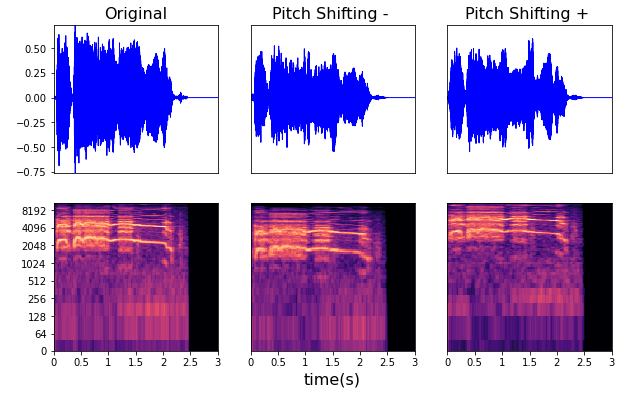

In [21]:
signal_a1 = librosa.effects.pitch_shift(signal, sr, n_steps=-6)
name_a1 = "Pitch Shifting - "
signal_a2 = librosa.effects.pitch_shift(signal, sr, n_steps=6)
name_a2 = "Pitch Shifting + "

view_ADA(name_a1,name_a2)


In [22]:
ipd.Audio(signal_a1 , rate=sr)

In [23]:
ipd.Audio(signal_a2 , rate=sr)

## Time Stretching (TS)
With [librosa](https://librosa.org/doc/latest/effects.html)

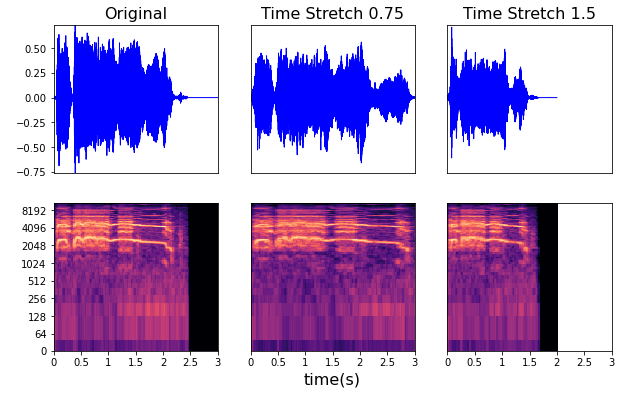

In [24]:
signal_a1 = librosa.effects.time_stretch(signal,0.75)
name_a1 = "Time Stretch 0.75"
signal_a2 = librosa.effects.time_stretch(signal, 1.5)
name_a2 = "Time Stretch 1.5"

view_ADA(name_a1,name_a2)

In [25]:
ipd.Audio(signal_a1 , rate=sr)

In [26]:
ipd.Audio(signal_a2 , rate=sr)

## Loudness (L)
With [audiomentations](https://github.com/iver56/audiomentations)


It is also possible to use `LoudnessNormalization` to volume adjustment transformation.



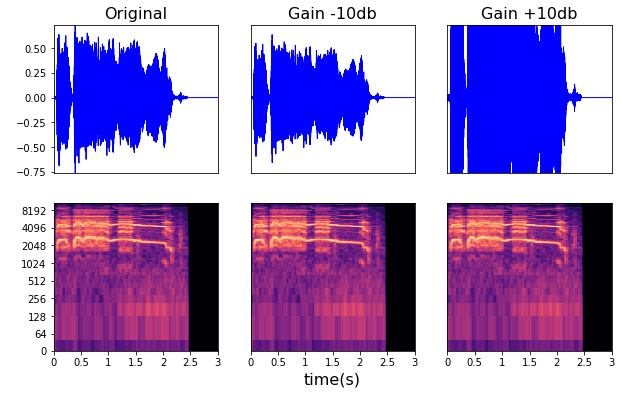

In [27]:
augment = Compose([Gain(min_gain_in_db=- 10, max_gain_in_db=0, p=1)])
signal_a1 = augment(samples=signal, sample_rate=sr)
name_a1 = "Gain -10db"

augment = Compose([Gain(min_gain_in_db=0, max_gain_in_db=10, p=1)])
signal_a2 = augment(samples=signal, sample_rate=sr)
name_a2 = "Gain +10db"

view_ADA(name_a1,name_a2)

In [28]:
ipd.Audio(signal_a1 , rate=sr)

In [29]:
ipd.Audio(signal_a2 , rate=sr)

## Background Noise (BN)
With [audiomentations](https://github.com/iver56/audiomentations)

Noises from [ESC dataset](https://github.com/karolpiczak/paper-2015-esc-dataset)

It is also possible to use `AddShortNoises` add background noise.

/usr/local/lib/python3.7/dist-packages/audiomentations/core/audio_loading_utils.py:117: UserWarning: /content/survey-audio-aug/urban/urban2.wav had to be resampled from 44100 hz to 22050 hz. This hurt execution time.
  str(file_path), actual_sample_rate, sample_rate
/usr/local/lib/python3.7/dist-packages/audiomentations/augmentations/transforms.py:866: UserWarning: The file /content/survey-audio-aug/urban/urban2.wav is too silent to be added as noise. Returning the input unchanged.
  " unchanged.".format(self.parameters["noise_file_path"])
/usr/local/lib/python3.7/dist-packages/audiomentations/core/audio_loading_utils.py:117: UserWarning: /content/survey-audio-aug/animals/animal1.wav had to be resampled from 44100 hz to 22050 hz. This hurt execution time.
  str(file_path), actual_sample_rate, sample_rate


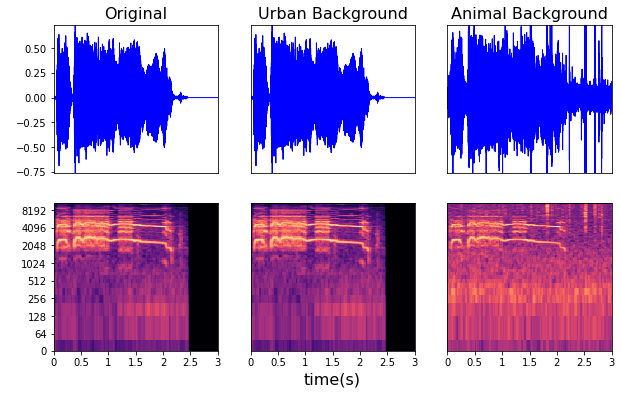

In [30]:
noise="/content/survey-audio-aug/urban"

augment = Compose([AddBackgroundNoise(sounds_path=noise, min_snr_in_db=1, max_snr_in_db=2,p=1, noise_rms="relative")])
signal_a1 = augment(samples=signal, sample_rate=sr)
name_a1 = "Urban Background"


noise="/content/survey-audio-aug/animals"

augment = Compose([AddBackgroundNoise(sounds_path=noise, min_snr_in_db=1, max_snr_in_db=2, p=1,noise_rms="relative")])
signal_a2 = augment(samples=signal, sample_rate=sr)
name_a2 = "Animal Background"

view_ADA(name_a1,name_a2)

In [31]:
ipd.Audio(signal_a1 , rate=sr)

In [32]:
ipd.Audio(signal_a2 , rate=sr)

## Synthetic Noise (SN)

With [audiomentations](https://github.com/iver56/audiomentations)


It is also possible to use `AddGaussianSNR` to add synthetic noise.

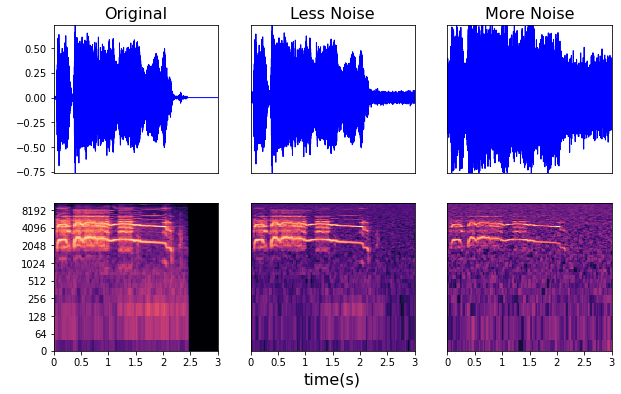

In [33]:
augment = Compose([AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.02, p=1)])
signal_a1 = augment(samples=signal, sample_rate=sr)
name_a1 = "Less Noise"


augment = Compose([AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.2, p=1)])
signal_a2 = augment(samples=signal, sample_rate=sr)
name_a2 = "More Noise"

view_ADA(name_a1,name_a2)

In [34]:
ipd.Audio(signal_a1 , rate=sr)

In [35]:
ipd.Audio(signal_a2 , rate=sr)

## Silence Trimming (ST)
With [librosa](https://librosa.org/doc/latest/effects.html)

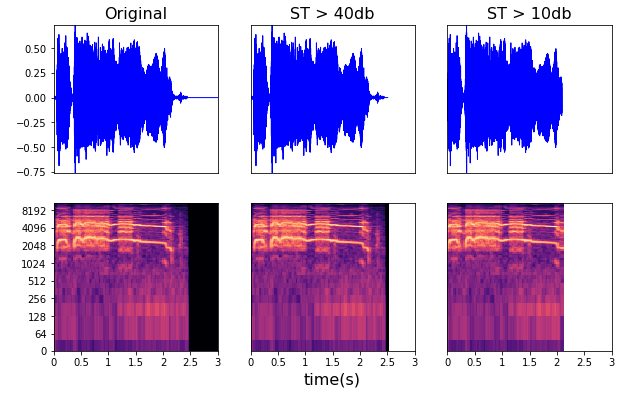

In [36]:
signal_a1,_ = librosa.effects.trim(signal)
name_a1 = "ST > 40db"
signal_a2,_ = librosa.effects.trim(signal, top_db=10)
name_a2 = "ST > 10db"

view_ADA(name_a1,name_a2)

In [37]:
ipd.Audio(signal_a1 , rate=sr)

In [38]:
ipd.Audio(signal_a2 , rate=sr)

## Time Shifting (TiS)
With [audiomentations](https://github.com/iver56/audiomentations)

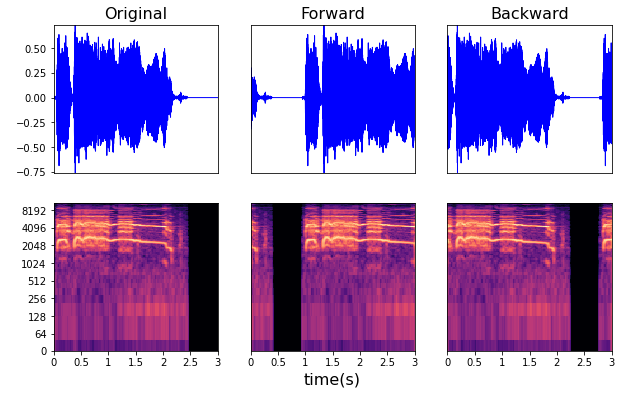

In [39]:
augment = Compose([Shift(min_fraction=0, max_fraction=0.5, p=1)])
signal_a1 = augment(samples=signal, sample_rate=sr)
name_a1 = "Forward"


augment = Compose([Shift(min_fraction=-.5, max_fraction=0, p=1)])
signal_a2 = augment(samples=signal, sample_rate=sr)
name_a2 = "Backward"

view_ADA(name_a1,name_a2)

In [40]:
ipd.Audio(signal_a1 , rate=sr)

In [41]:
ipd.Audio(signal_a2 , rate=sr)

## Clipping (C)

With [audiomentations](https://github.com/iver56/audiomentations)

It is also possible to use `ClippingDistortion` to clipping transformation.

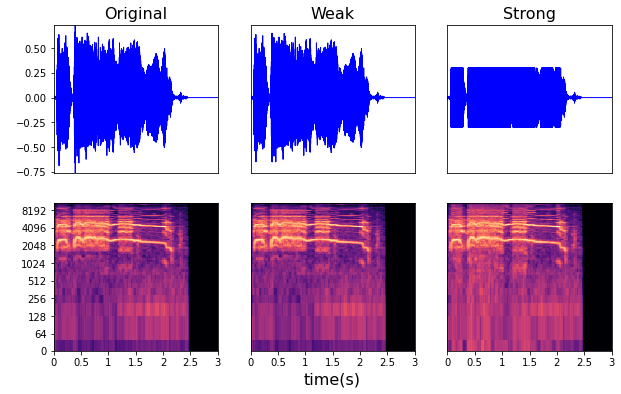

In [42]:
augment = Compose([Clip(a_min=- 0.65, a_max=0.65, p=1)])
signal_a1 = augment(samples=signal, sample_rate=sr)
name_a1 = "Weak"


augment = Compose([Clip(a_min=-0.3, a_max=0.3, p=1)])
signal_a2 = augment(samples=signal, sample_rate=sr)
name_a2 = "Strong"

view_ADA(name_a1,name_a2)

In [43]:
ipd.Audio(signal_a1 , rate=sr)

In [44]:
ipd.Audio(signal_a2 , rate=sr)

## Impulse Response (IR)

With [audiomentations](https://github.com/iver56/audiomentations)

Impulse responses are from [The MIT McDermott dataset ](https://mcdermottlab.mit.edu/Reverb/IR_Survey.html)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The AddImpulseResponse class has been renamed to ApplyImpulseResponse This alias will be removed in future versions. Use ApplyImpulseResponse directly instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/audiomentations/core/audio_loading_utils.py:164: UserWarning: /content/drive/MyDrive/01_projeto_danca_para_surdos/Publicações/Survey_data_aug/Figuras/audio/impulse1.wav had to be resampled from 32000 hz to 22050 hz. This hurt execution time.
  str(file_path), actual_sample_rate, sample_rate
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: The AddImpulseResponse class has been renamed to ApplyImpulseResponse This alias will be removed in future versions. Use ApplyImpulseResponse directly instead.
  


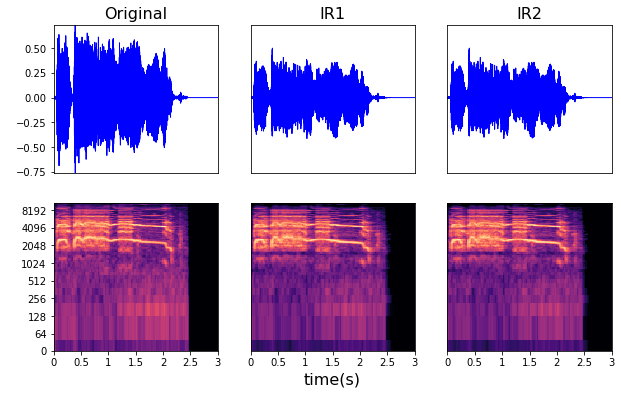

In [45]:
dir="/content/drive/MyDrive/01_projeto_danca_para_surdos/Publicações/Survey_data_aug/Figuras/audio"

augment = Compose([ AddImpulseResponse(ir_path= dir,p=1)])
signal_a1 = augment(samples=signal, sample_rate=sr)
name_a1 = "IR1"


augment = Compose([ AddImpulseResponse(ir_path= dir,p=1)])
signal_a2 = augment(samples=signal, sample_rate=sr)
name_a2 = "IR2"

view_ADA(name_a1,name_a2)

In [46]:
ipd.Audio(signal_a1 , rate=sr)

In [47]:
ipd.Audio(signal_a2 , rate=sr)

## Filter (F)
With [audiomentations](https://github.com/iver56/audiomentations)


It is also possible to use `BandPassFilter` to add filter transformation.


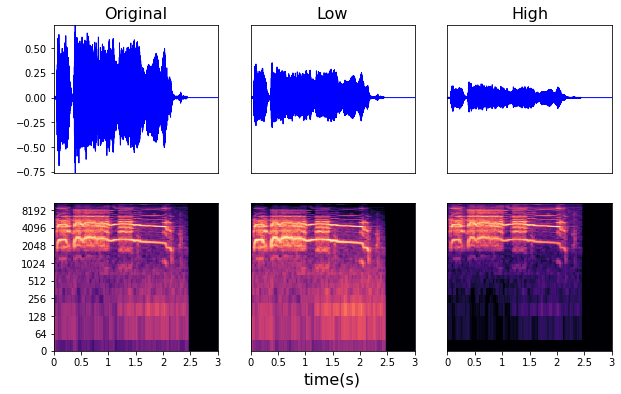

In [48]:
augment = Compose([LowPassFilter(min_cutoff_freq=0, max_cutoff_freq=1000, p=1)])
signal_a1 = augment(samples=signal, sample_rate=sr)
name_a1 = "Low"


augment = Compose([HighPassFilter(min_cutoff_freq=5000, max_cutoff_freq=8000, p=1)])
signal_a2 = augment(samples=signal, sample_rate=sr)
name_a2 = "High"

view_ADA(name_a1,name_a2)

In [49]:
ipd.Audio(signal_a1 , rate=sr)

In [50]:
ipd.Audio(signal_a2 , rate=sr)

## Random Maskn (RM)
With [audiomentations](https://github.com/iver56/audiomentations)

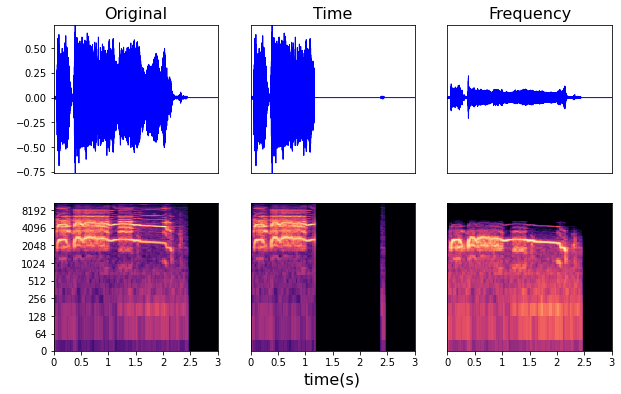

In [51]:
augment = Compose([TimeMask(p=1)])
signal_a1 = augment(samples=signal, sample_rate=sr)
name_a1 = "Time"


augment = Compose([FrequencyMask(min_frequency_band=0.3, max_frequency_band=.9,p=1)])
signal_a2 = augment(samples=signal, sample_rate=sr)
name_a2 = "Frequency"

view_ADA(name_a1,name_a2)

In [52]:
ipd.Audio(signal_a1 , rate=sr)

In [53]:
ipd.Audio(signal_a2 , rate=sr)

## MP3 Compression (MC)
With [audiomentations](https://github.com/iver56/audiomentations)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


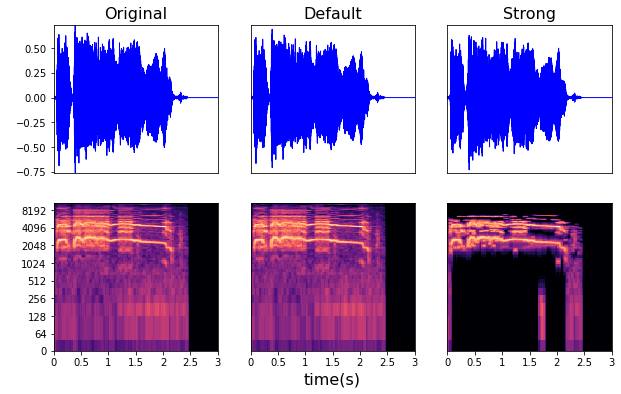

In [54]:
augment = Compose([Mp3Compression(p=1)])
signal_a1 = augment(samples=signal, sample_rate=sr)
name_a1 = "Default"


augment = Compose([Mp3Compression(min_bitrate= 8, max_bitrate= 16, p=1)])
signal_a2 = augment(samples=signal, sample_rate=sr)
name_a2 = "Strong"

view_ADA(name_a1,name_a2)

In [55]:
ipd.Audio(signal_a1 , rate=sr)

In [56]:
ipd.Audio(signal_a2 , rate=sr)

## Inversion (I)
With [audiomentations](https://github.com/iver56/audiomentations)

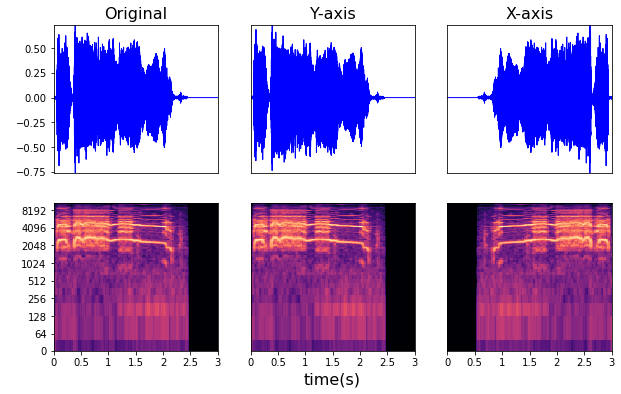

In [57]:
augment = Compose([PolarityInversion(p=1)])
signal_a1 = augment(samples=signal, sample_rate=sr)
name_a1 = "Y-axis"


augment = Compose([Reverse(p=1)])
signal_a2 = augment(samples=signal, sample_rate=sr)
name_a2 = "X-axis"

view_ADA(name_a1,name_a2)

In [58]:
ipd.Audio(signal_a1 , rate=sr)

In [59]:
ipd.Audio(signal_a2 , rate=sr)

##  Peak Normalization (PN)
With [audiomentations](https://github.com/iver56/audiomentations)

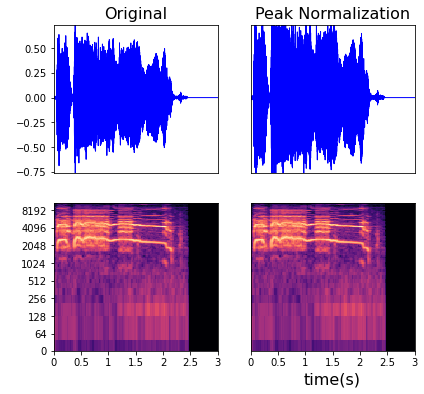

In [60]:
augment = Compose([Normalize(p=1)])
signal_a1 = augment(samples=signal, sample_rate=sr)
name_a1 = "Peak Normalization"

name_a2 = None

view_ADA(name_a1,name_a2)

In [61]:
ipd.Audio(signal_a1 , rate=sr)

##  Tangent Distortion (TD)
With [audiomentations](https://github.com/iver56/audiomentations)

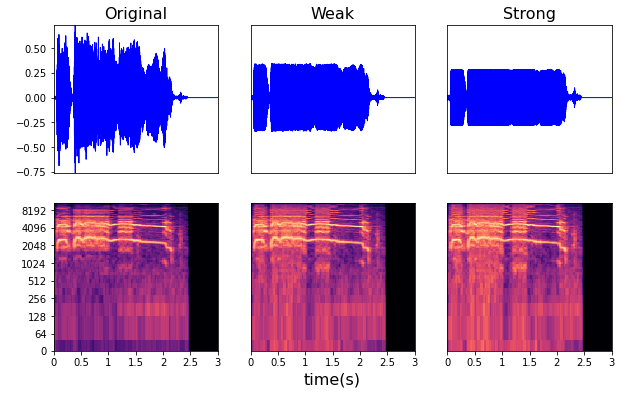

In [62]:
augment = Compose([TanhDistortion(min_distortion= 0.01, max_distortion= 0.5, p = 1)])
signal_a1 = augment(samples=signal, sample_rate=sr)
name_a1 = "Weak"


augment = Compose([TanhDistortion(min_distortion= 0.5, max_distortion= 1, p = 1)])
signal_a2 = augment(samples=signal, sample_rate=sr)
name_a2 = "Strong"

view_ADA(name_a1,name_a2)

In [63]:
ipd.Audio(signal_a1 , rate=sr)

In [64]:
ipd.Audio(signal_a2 , rate=sr)

# Image Data Augmentation
Its traditional image transformations apllyed in spectragrams as a image 

In [79]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

import librosa
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

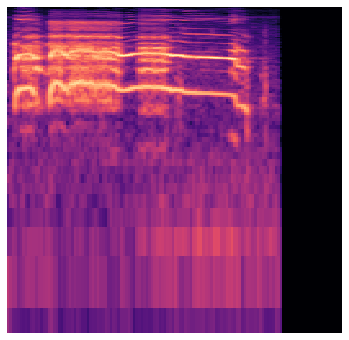

In [145]:
fig = plt.figure(figsize=(6, 6))#,dpi=300
gs = gridspec.GridSpec(nrows=1, ncols=1, height_ratios=[1])


ax1= fig.add_subplot(gs[0,0])
M = librosa.feature.melspectrogram(y=signal, sr=sr, power=1)
librosa.display.specshow(librosa.core.amplitude_to_db(M, ref=np.max),
                        y_axis='log', x_axis='time', ax=ax1)

ax1.axis('off')
plt.savefig('/content/survey-audio-aug/rooster.jpg', bbox_inches="tight")



In [146]:
img = load_img('/content/survey-audio-aug/rooster.jpg')
data = img_to_array(img)
samples = expand_dims(data, 0)

## IDA view function

In [134]:
def IDA_view():
  fig = plt.figure(figsize=(10,3))#,dpi=300
  gs = gridspec.GridSpec(nrows=1, ncols=3)

  ax0 = fig.add_subplot(gs[0,0])
  ax0.imshow(data.astype('uint8'))
  ax0.set_title('Original',fontsize=16)
  ax0.axis('off')



  ax1 = fig.add_subplot(gs[0,1])
  ax1.imshow(batch1[0].astype('uint8'))
  ax1.set_title(name1,fontsize=16)
  ax1.axis('off')



  ax2 = fig.add_subplot(gs[0,2])
  batch = it.next()
  ax2.imshow(batch2[0].astype('uint8'))
  ax2.set_title(name2,fontsize=16)
  ax2.axis('off')


## Flip (F)

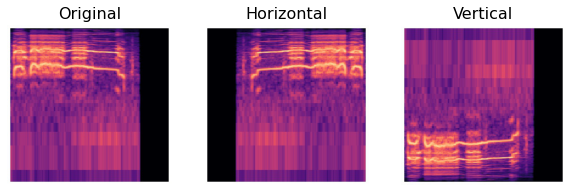

In [152]:
datagen = ImageDataGenerator(horizontal_flip=True)
it = datagen.flow(samples, batch_size=1)
batch1 = it.next()
name1= "Horizontal"


datagen = ImageDataGenerator(vertical_flip=True)
it = datagen.flow(samples, batch_size=1)
batch2 = it.next()
name2 = "Vertical"

IDA_view()

## Zoom Range(ZR)

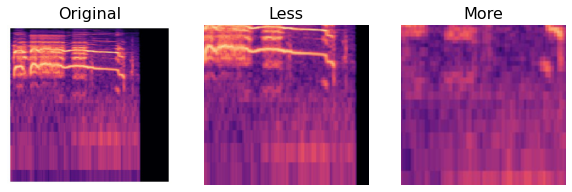

In [156]:
datagen = ImageDataGenerator(zoom_range=[0.7,0.8])
it = datagen.flow(samples, batch_size=1)
batch1 = it.next()
name1= "Less"


datagen = ImageDataGenerator(zoom_range=[0.4,0.5])
it = datagen.flow(samples, batch_size=1)
batch2 = it.next()
name2 = "More"
IDA_view()

## Shift (S)

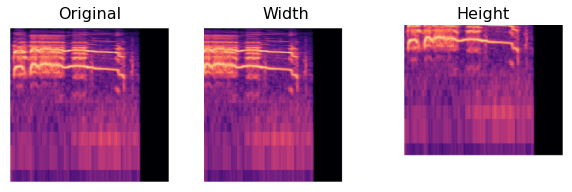

In [157]:
datagen = ImageDataGenerator(width_shift_range=[-50,50])
it = datagen.flow(samples, batch_size=1)
batch1 = it.next()
name1= "Width"


datagen = ImageDataGenerator(height_shift_range=0.5)
it = datagen.flow(samples, batch_size=1)
batch2 = it.next()
name2 = "Height"

IDA_view()

## Rotation Angle (RA)

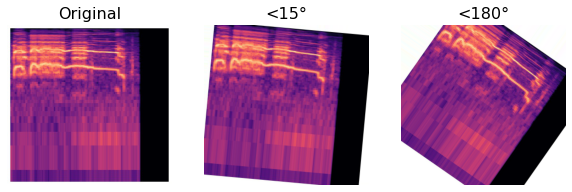

In [160]:
datagen = ImageDataGenerator(rotation_range=15)
it = datagen.flow(samples, batch_size=1)
batch1 = it.next()
name1= "<15°"


datagen = ImageDataGenerator(rotation_range=180)
it = datagen.flow(samples, batch_size=1)
batch2 = it.next()
name2 = "<180°"

IDA_view()

## Brightness Range (BR)

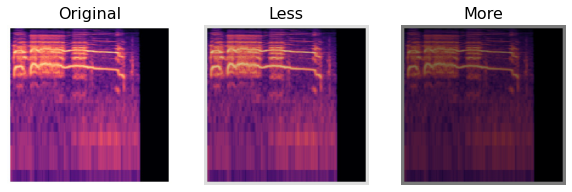

In [178]:
datagen = ImageDataGenerator(brightness_range=[0.6,0.9])
it = datagen.flow(samples, batch_size=1)
batch1 = it.next()
name1= "Less"


datagen = ImageDataGenerator(brightness_range=[0.2,0.5])
it = datagen.flow(samples, batch_size=1)
batch2 = it.next()
name2 = "More"

IDA_view()

# Spectrogram Data Augmentation

It is a group of techniques designed to apply deformations in spectrograms.



In [ ]:
!pip install audiomentations

In [ ]:
import librosa            
from audiomentations import SpecCompose, SpecChannelShuffle, SpecFrequencyMask

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

## SDA View function


In [ ]:
def SDA_view():
  fig = plt.figure(figsize=(10,3))#,dpi=300
  gs = gridspec.GridSpec(nrows=1, ncols=3)

  ax0 = fig.add_subplot(gs[0,0])
  ax0.imshow(data.astype('uint8'))
  ax0.set_title('Original',fontsize=16)
  ax0.axis('off')



  ax1 = fig.add_subplot(gs[0,1])
  ax1.imshow(batch1[0].astype('uint8'))
  ax1.set_title(name1,fontsize=16)
  ax1.axis('off')



  ax2 = fig.add_subplot(gs[0,2])
  batch = it.next()
  ax2.imshow(batch2[0].astype('uint8'))
  ax2.set_title(name2,fontsize=16)
  ax2.axis('off')


## Frequency and time mask


NameError: ignored

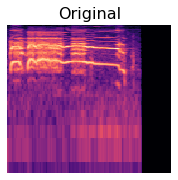

In [179]:



fig = plt.figure(figsize=(10, 6))#,dpi=300
gs = gridspec.GridSpec(nrows=2, ncols=3, height_ratios=[1, 1])


ax0 = fig.add_subplot(gs[0,0])
librosa.display.specshow(librosa.core.amplitude_to_db(M, ref=np.max),
                        y_axis='log', x_axis='time', ax=ax0)
ax0.set_title('Original',fontsize=16)
ax0.axis('off')


augment = SpecCompose( [SpecFrequencyMask(p=1)])
M = librosa.feature.melspectrogram(y=signal, sr=sr, power=1)
augmented_spectrogram = augment(M)

ax1 = fig.add_subplot(gs[0, 1])
librosa.display.specshow(librosa.core.amplitude_to_db(augmented_spectrogram, ref=np.max),
                        y_axis='log', x_axis='time', ax=ax1)
ax1.set_title('Frequency Mask ',fontsize=16)
ax1.axis('off')


augment = SpecCompose([SpecFrequencyMask(p=1)])
M = librosa.feature.melspectrogram(y=signal, sr=sr, power=1)
augmented_spectrogram = augment(M.transpose()).transpose()

ax2 = fig.add_subplot(gs[0, 2])
librosa.display.specshow(librosa.core.amplitude_to_db(augmented_spectrogram, ref=np.max),
                        y_axis='log', x_axis='time', ax=ax2)
ax2.set_title('Time Mask ',fontsize=16)
ax2.axis('off')

# plt.savefig('/content/drive/MyDrive/01_projeto_danca_para_surdos/Publicações/Survey_data_aug/Figuras/SDA.eps.eps', bbox_inches="tight")